In [1]:
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [2]:
library(fpp2)

Loading required package: ggplot2

Loading required package: fma

Loading required package: expsmooth



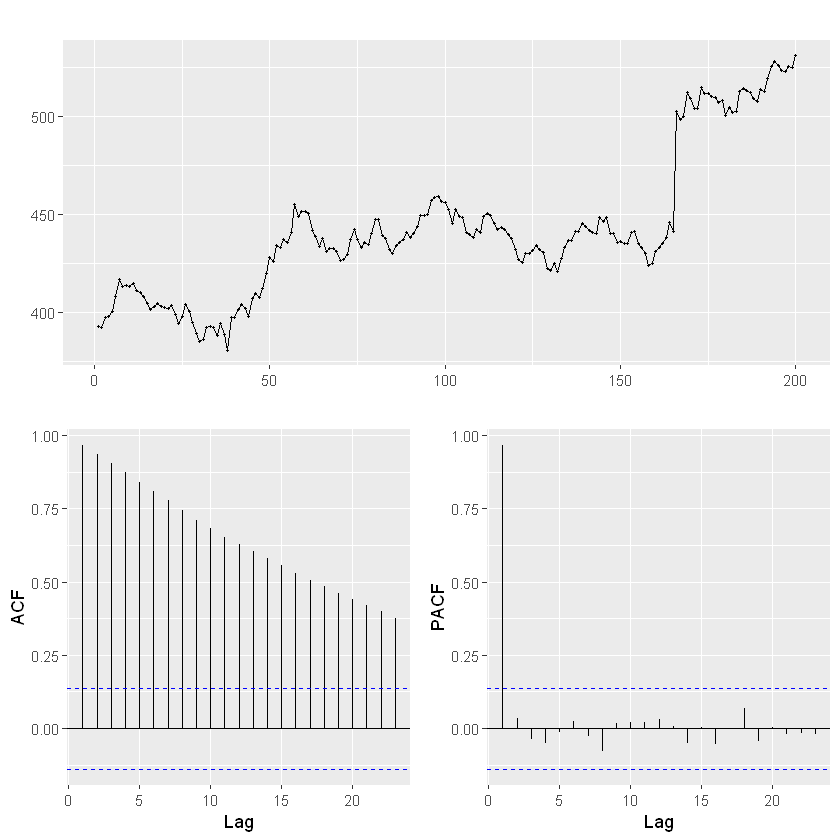

In [4]:
##1. goog200 원본 데이터 시계열 판단
#1-1. ACF, PACF함수 사용해 시계열 판단
ggtsdisplay(goog200)

In [6]:
#1-2. Ljung-Box 검정
Box.test(goog200, lag=10, type='Ljung-Box')


	Box-Ljung test

data:  goog200
X-squared = 1425.4, df = 10, p-value < 2.2e-16


In [7]:
#1-3. KPSS 검정
library(urca)
summary(ur.kpss(goog200))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 4 lags. 

Value of test-statistic is: 2.7441 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


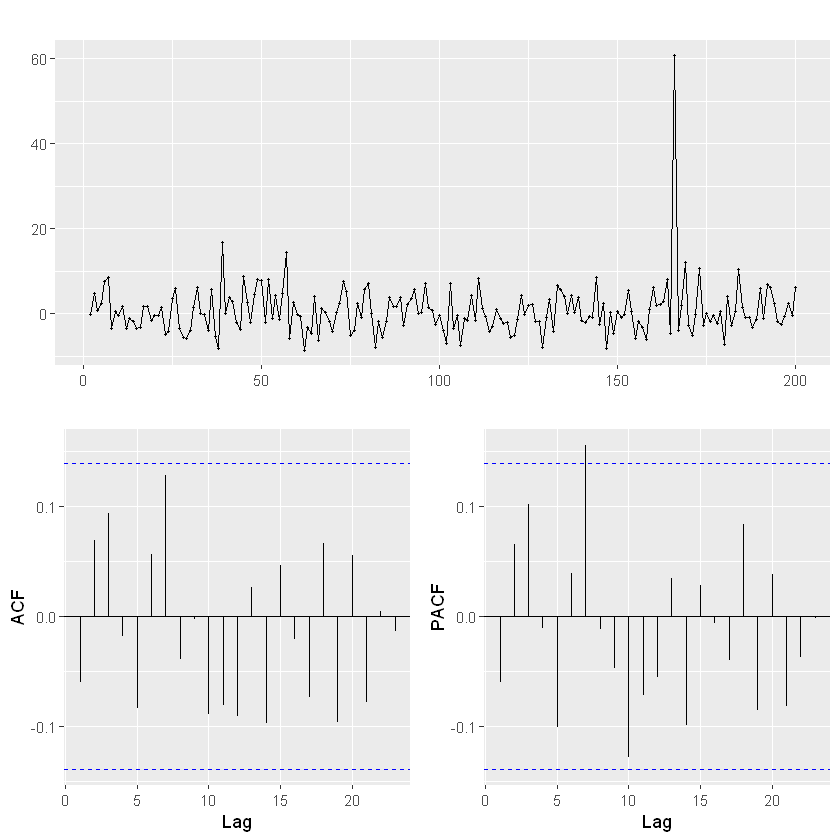

In [9]:
##2. goog200 차분데이터
#2-1. ACF, PACF 함수로 표시
ggtsdisplay(diff(goog200))

In [10]:
#2-2. Ljung-Box 검정
Box.test(diff(goog200))


	Box-Pierce test

data:  diff(goog200)
X-squared = 0.72565, df = 1, p-value = 0.3943


In [12]:
#2-3. KPSS 검정
summary(ur.kpss(diff(goog200)))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 4 lags. 

Value of test-statistic is: 0.1163 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


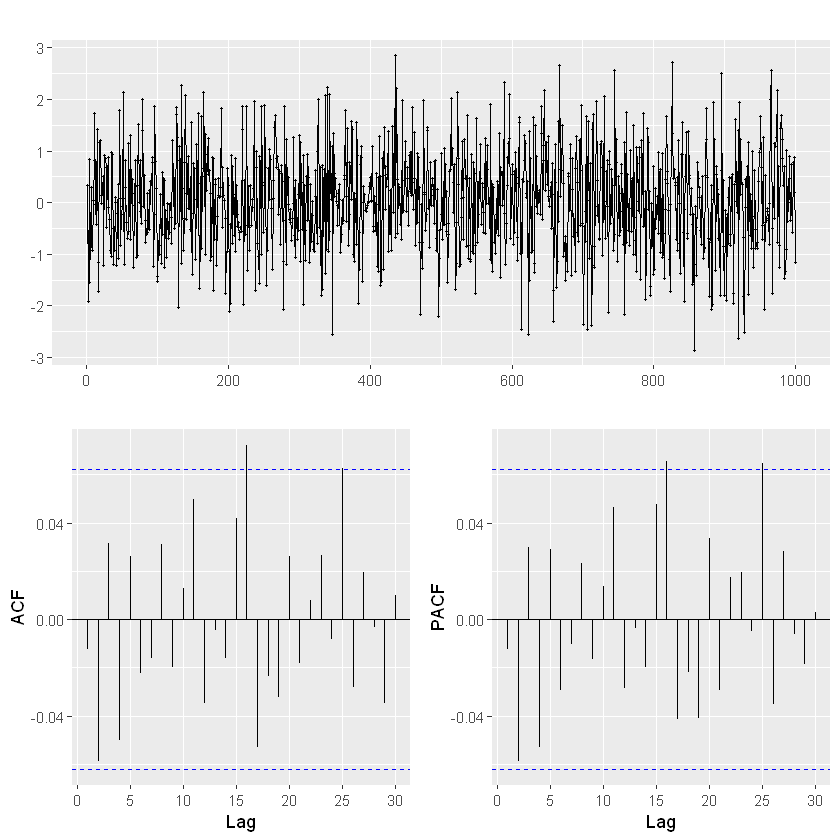

In [27]:
## 3. 백색잡음 데이터
#3-1. ACF, PACF 함수 
wn<-ts(rnorm(1000))
ggtsdisplay(wn)

In [28]:
#3-2. Ljung-Box 검정
Box.test(wn)


	Box-Pierce test

data:  wn
X-squared = 0.15074, df = 1, p-value = 0.6978


In [29]:
#3-3. KPSS 검정
summary(ur.kpss(wn))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 7 lags. 

Value of test-statistic is: 0.112 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


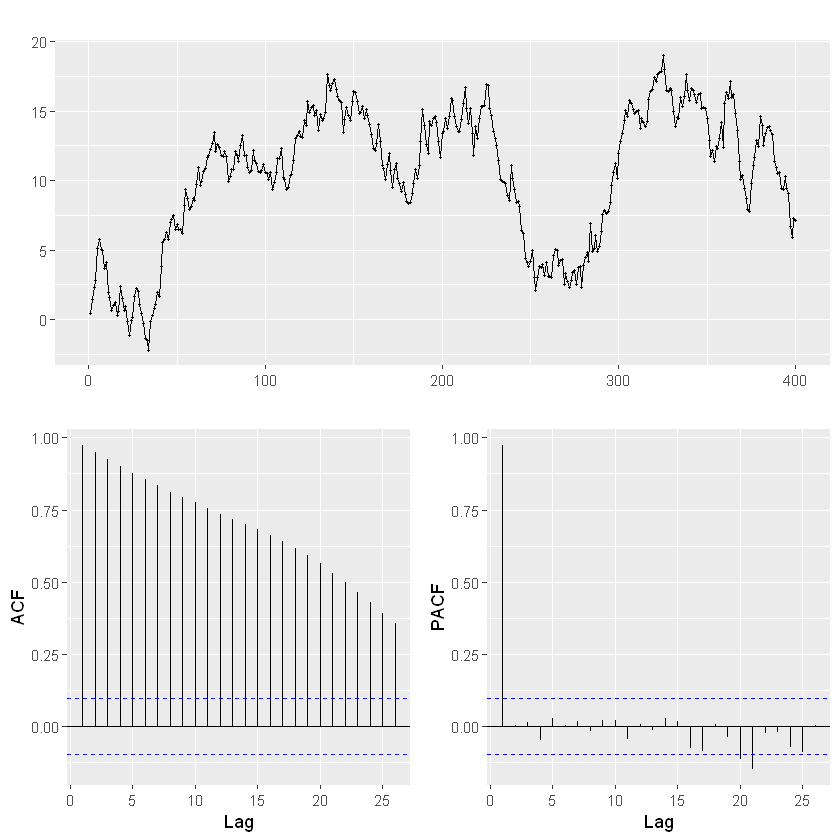

In [19]:
## 4. 확률보행과정(절편이없는 경우) 데이터
x<-rnorm(400)
w<-x

for (t in 2:400){
    x[t] = x[t-1] + w[t]
}
x.ts<-ts(x)
#3-1. ACF, PACF 함수
ggtsdisplay(x.ts)

In [20]:
#4-2. Ljung-Box 검정
Box.test(x.ts)


	Box-Pierce test

data:  x.ts
X-squared = 379.68, df = 1, p-value < 2.2e-16


In [21]:
#4-3. KPSS 검정
summary(ur.kpss(x.ts))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 5 lags. 

Value of test-statistic is: 1.1533 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


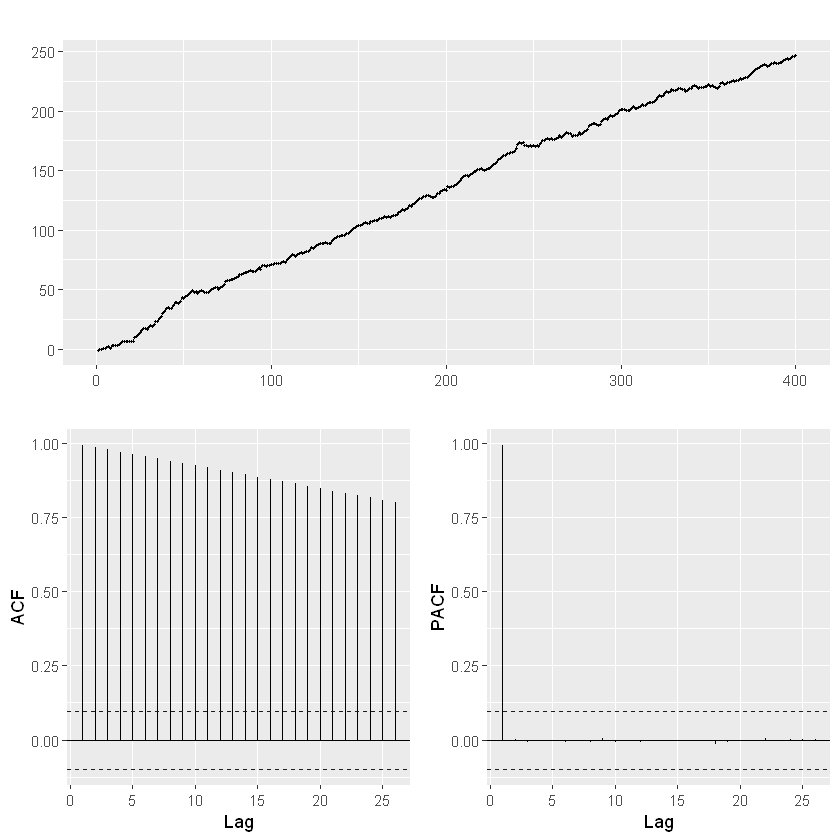

In [30]:
## 5. 확률보행과정(절편이 있는 경우) 데이터
x<-rnorm(400)
w<-x

for (t in 2:400){
    x[t] = x[t-1] + w[t] + 0.6
}
x2.ts<-ts(x)
# 5-1. ACF, PACF함수 적용
ggtsdisplay(x2.ts)

In [31]:
# 5-2. Ljung-Box 검정
Box.test(x2.ts)


	Box-Pierce test

data:  x2.ts
X-squared = 393.97, df = 1, p-value < 2.2e-16


In [32]:
# 5-3. KPSS 검정
summary(ur.kpss(x2.ts))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 5 lags. 

Value of test-statistic is: 6.7482 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739
